In [35]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Script to run runme_terminus_sensitivity_basic.m tutorial translted from Matlab to Python with LHS
# Mikayla Pascual 06/28/22
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#import 
from MatlabFuncs import *
from model import *
from triangle import *
from bamg import bamg
from savevars import *
import plotdoc
from loadmodel import *
from os.path import exists

from scipy.io import loadmat
from m1qn3inversion import *
import numpy as np
from ContourToNodes import *
from solve import *

In [36]:
# Load some mat files to use later
vel_mat = loadmat('Cheat_matfiles/vel.mat')
hmaxVertices_mat = loadmat('Cheat_matfiles/hmaxVertices.mat')
param_mat = loadmat('Cheat_matfiles/param.mat')

velx = vel_mat['velx']
vely = vel_mat['vely']
vel = vel_mat['vel']

hmaxVertices = hmaxVertices_mat['hmaxVertices']

In [37]:
# Setup
region = 'SAtoES';
start_year = 1985;

# Mesh sizing
triangleresolution = 1000;
hmin = 300;
hmax = 10000;

# Mesh
md = model()
md = triangle(md,'./Exp/' +region+ '.exp',triangleresolution) # set up mesh

md = bamg(md,'hmin',hmin,'hmax',hmax,'field',vel,'err',2,'hmaxVertices',hmaxVertices);

#savevars('./Models/' +region+ '_mesh', 'md', md)

# 

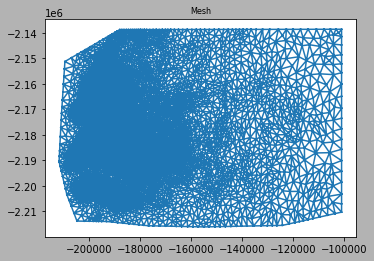

In [38]:
# Plot mesh
plotmodel(md,'data','mesh')

In [39]:
# Load and convert param_mat values
md.geometry.thickness = param_mat['geometry_thickness']
md.geometry.bed = param_mat['geometry_bed']
md.geometry.surface = param_mat['geometry_surface']
md.geometry.base = param_mat['geometry_base']
md.mask.ice_levelset = param_mat['mask_ice_levelset']
md.mask.groundedice_levelset = param_mat['mask_groundedice_levelset']
md.inversion.vx_obs = param_mat['inversion_vx_obs']
md.inversion.vy_obs = param_mat['inversion_vy_obs']
md.inversion.vel_obs = param_mat['inversion_vel_obs']
md.initialization.vx = param_mat['initialization_vx']
md.initialization.vy = param_mat['initialization_vy']
md.initialization.vz = param_mat['initialization_vz']
md.initialization.vel = param_mat['initialization_vel']
md.friction.coefficient = param_mat['friction_coefficient']
md.materials.rheology_n = param_mat['rheology_n']
md.materials.rheology_B = param_mat['rheology_B']
md.basalforcings.groundedice_melting_rate = param_mat['basalforcings_groundedice_melting_rate']
md.basalforcings.floatingice_melting_rate = param_mat['basalforcings_floatingice_melting_rate']
md.smb.mass_balance = param_mat['smb_mass_balance']
md.basalforcings.geothermalflux = param_mat['basalforcings_geothermalflux']
md.stressbalance.spcvx = param_mat['stressbalance_spcvx']
md.stressbalance.spcvy = param_mat['stressbalance_spcvy']
md.stressbalance.spcvz = param_mat['stressbalance_spcvz']
md.stressbalance.referential = param_mat['stressbalance_referential']
md.stressbalance.loadingforce = param_mat['stressbalance_loadingforce']
md.masstransport.spcthickness = param_mat['masstransport_spcthickness']

/efs/issm/issm/trunk-jpl/src/m/plot/plotmodel.py:123: MatplotlibDeprecationWarning: 
The 'add_all' parameter of __init__() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'add_all', they should be passed as keyword, not positionally.
  axgrid = ImageGrid(


Too many axes present, we delete the overflow


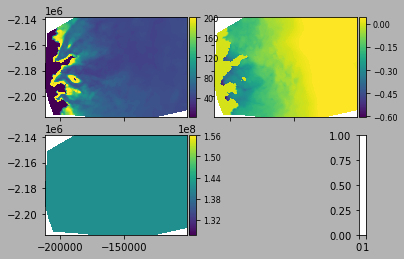

In [40]:
plotmodel(md, 'data', md.friction.coefficient, \
              'data', md.smb.mass_balance, \
              'data', md.materials.rheology_B)

In [41]:
md.friction.coefficient[0]

array([117.4911716])

In [42]:
[md.friction.coefficient[0] * -0.12]

[array([-14.09894059])]

In [43]:
friction_after = md.friction.coefficient[0] + [md.friction.coefficient[0] * -0.12]
friction_after

array([[103.392231]])

In [44]:
print(len(md.friction.coefficient))

12112


In [45]:
# switch to conda env:lhs here
import lhsmdu
import matplotlib.pyplot as plt
import numpy as np

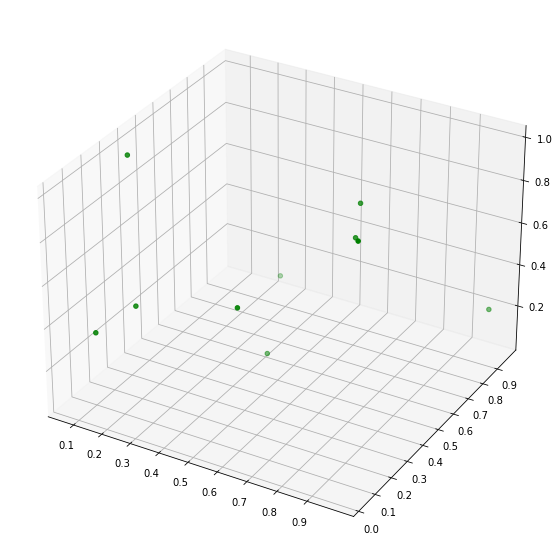

In [55]:
# from sahilm89/lhsmdu on Git

k = lhsmdu.sample(3, 10) # Latin Hypercube Sampling with multi-dimensional uniformity, 
                        # 3 variables with 10 samples each
k = np.array(k)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.set_xticks(np.arange(0,1,0.1))
ax.set_yticks(np.arange(0,1,0.1))
ax.scatter(k[0,:], k[1,:], k[2,:], color="g")
plt.show()

In [76]:
# Utilize LHS to vary model parameters

# collect -20% to 20% range
k = k * 0.4 - 0.2

# change initial model parameters to proportional LHS output
friction_after = md.friction.coefficient + [md.friction.coefficient * k[0]]
smb_mass_balance_after = md.smb.mass_balance + [md.smb.mass_balance * k[1]]
materials_rheology_B_after = md.materials.rheology_B + [md.materials.rheology_B * k[2]]

In [93]:
friction_after

array([[[78.69749084, 78.52433322, 78.82542571, ..., 78.81047175,
         78.55880605, 78.58881932],
        [ 0.66981621,  0.66834241,  0.6709051 , ...,  0.67077782,
          0.66863582,  0.66889127],
        [ 0.66981621,  0.66834241,  0.6709051 , ...,  0.67077782,
          0.66863582,  0.66889127],
        ...,
        [40.87222947, 40.78229854, 40.93867355, ..., 40.93090708,
         40.80020231, 40.81578996],
        [41.69108009, 41.59934745, 41.75885535, ..., 41.75093328,
         41.61760991, 41.63350985],
        [32.12097964, 32.05030404, 32.17319723, ..., 32.16709366,
         32.06437439, 32.07662453]]])

In [78]:
smb_mass_balance_after

array([[[-0.10018865, -0.10006509, -0.10023038, ..., -0.10028377,
         -0.09987537, -0.09995197],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.25249635, -0.25218495, -0.25260152, ..., -0.25273608,
         -0.25170681, -0.25189987],
        [-0.19993265, -0.19968608, -0.20001593, ..., -0.20012248,
         -0.19930748, -0.19946035],
        [ 0.02695513,  0.02692189,  0.02696636, ...,  0.02698072,
          0.02687084,  0.02689145]]])

In [82]:
materials_rheology_B_after

array([[[94821875.73105994, 95365507.23769736, 95179646.33166254, ...,
         95233529.78133819, 95021644.99711472, 95058566.36603391],
        [94821875.73105994, 95365507.23769736, 95179646.33166254, ...,
         95233529.78133819, 95021644.99711472, 95058566.36603391],
        [94821875.73105994, 95365507.23769736, 95179646.33166254, ...,
         95233529.78133819, 95021644.99711472, 95058566.36603391],
        ...,
        [94821875.73105994, 95365507.23769736, 95179646.33166254, ...,
         95233529.78133819, 95021644.99711472, 95058566.36603391],
        [94821875.73105994, 95365507.23769736, 95179646.33166254, ...,
         95233529.78133819, 95021644.99711472, 95058566.36603391],
        [94821875.73105994, 95365507.23769736, 95179646.33166254, ...,
         95233529.78133819, 95021644.99711472, 95058566.36603391]]])

In [75]:
md.smb.mass_balance

array([[-0.14947253],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.37670203],
       [-0.29828168],
       [ 0.04021465]])

In [80]:
md.materials.rheology_B

array([[1.41898341e+08],
       [1.41898341e+08],
       [1.41898341e+08],
       ...,
       [1.41898341e+08],
       [1.41898341e+08],
       [1.41898341e+08]])

ValueError: data list contains more than two vectore, we can not cope with that

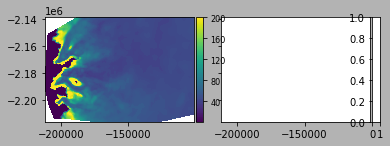

In [95]:
plotmodel(md, 'data', md.friction.coefficient, 'data', friction_after)

In [85]:
# text file with LHS outputs
np.savetxt('friction_after.txt', friction_after)

ValueError: Expected 1D or 2D array, got 3D array instead